# Bokeh Demo


In [1]:
import numpy as np #Numerical python

import matplotlib.pylab as plt #Plotting

import seaborn as sns # Ditto

import bokeh # Ditto

from bokeh.plotting import figure, show, output_file
from bokeh.models import BoxSelectTool, HoverTool, ColumnDataSource, LogColorMapper

#For map plot
from bokeh.palettes import Viridis6 as palette
from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

#For periodic table plot
from bokeh.sampledata.periodic_table import elements
from bokeh.transform import dodge, factor_cmap


In [2]:
# Obligatory 'Hello World' example
print('Hello World')

Hello World


## Matplotlib

The granddaddy of python plotting.

Can do anything, just takes a bit of code.

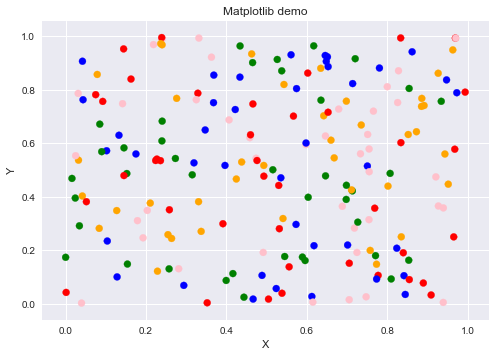

In [3]:
n = 200

x = np.random.random(size = n)
y = np.random.random(size = n)

#Set colours
c = ['red', 'blue', 'green', 'orange', 'pink'] * (200 / 5)

plt.scatter(x, y, c = c)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Matplotlib demo')
plt.show()

### Seaborn 

A favourite of scientists / research scientists.

Great for plotting statistical information quickly.

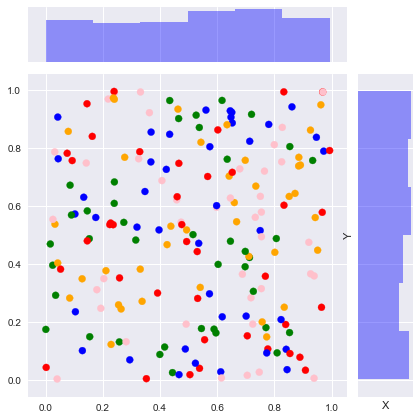

In [17]:
g = sns.JointGrid(x, y);
g = g.plot_joint(plt.scatter, c = c);
g = g.plot_marginals(sns.distplot, kde = False, color = 'b');
plt.show();

## Bokeh
A Python native alternative to Plotly. 

In [33]:
#Basic scatterplot (interaction between two variables)

#Set up figure window
p = figure(title = 'bokeh_demo')
p.xaxis.axis_label = 'X'
p.yaxis.axis_label = 'Y'

#Plot glyphs
p.circle(x, y, color = c, fill_alpha = 0.6, size = 10, line_color = 'pink')


output_file('basic_scatter.html', title = 'basic_scatter example')

show(p)

In [40]:
# Lets add a little more to the plot

radii = np.random.random(size = n) / 50

TOOLS = 'crosshair, pan, wheel_zoom, box_zoom, reset, tap, box_select, hover,  poly_select'

output_file('random_colour_scatter.html', title = 'random_colour_scatter example')

p = figure(tools = TOOLS)
p.scatter(x, y, radius = radii, fill_color = c, fill_alpha = 0.6, line_color = 'pink')

show(p)  # open a browser

### I mean yeah, that's KIND of cool. But I'm pretty bored of scatterplots. What else you got?

In [6]:
#Now for something a little different.

# bokeh.sampledata.download()

palette.reverse()

counties = {
    code: county for code, county in counties.items() if county["state"] == "tx"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
))

TOOLS = "pan,wheel_zoom,reset,hover,save"

p = figure(
    title="Texas Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

show(p)

### And to finish it off:

In [7]:
output_file("periodic_demo.html")

periods = ["I", "II", "III", "IV", "V", "VI", "VII"]
groups = [str(x) for x in range(1, 19)]

df = elements.copy()
df["atomic mass"] = df["atomic mass"].astype(str)
df["group"] = df["group"].astype(str)
df["period"] = [periods[x-1] for x in df.period]
df = df[df.group != "-"]
df = df[df.symbol != "Lr"]
df = df[df.symbol != "Lu"]

cmap = {
    "alkali metal"         : "#a6cee3",
    "alkaline earth metal" : "#1f78b4",
    "metal"                : "#d93b43",
    "halogen"              : "#999d9a",
    "metalloid"            : "#e08d49",
    "noble gas"            : "#eaeaea",
    "nonmetal"             : "#f1d4Af",
    "transition metal"     : "#599d7A",
}

source = ColumnDataSource(df)

p = figure(title="Periodic Table (omitting LA and AC Series)", plot_width=1000, plot_height=450,
           tools="", toolbar_location=None,
           x_range=groups, y_range=list(reversed(periods)))

p.rect("group", "period", 0.95, 0.95, source=source, fill_alpha=0.6, legend="metal",
       color=factor_cmap('metal', palette=list(cmap.values()), factors=list(cmap.keys())))

text_props = {"source": source, "text_align": "left", "text_baseline": "middle"}

x = dodge("group", -0.4, range=p.x_range)

r = p.text(x=x, y="period", text="symbol", **text_props)
r.glyph.text_font_style="bold"

r = p.text(x=x, y=dodge("period", 0.3, range=p.y_range), text="atomic number", **text_props)
r.glyph.text_font_size="8pt"

r = p.text(x=x, y=dodge("period", -0.35, range=p.y_range), text="name", **text_props)
r.glyph.text_font_size="5pt"

r = p.text(x=x, y=dodge("period", -0.2, range=p.y_range), text="atomic mass", **text_props)
r.glyph.text_font_size="5pt"

p.text(x=["3", "3"], y=["VI", "VII"], text=["LA", "AC"], text_align="center", text_baseline="middle")

p.add_tools(HoverTool(tooltips = [
    ("Name", "@name"),
    ("Atomic number", "@{atomic number}"),
    ("Atomic mass", "@{atomic mass}"),
    ("Type", "@metal"),
    ("CPK color", "$color[hex, swatch]:CPK"),
    ("Electronic configuration", "@{electronic configuration}"),
]))

p.outline_line_color = None
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_standoff = 0
p.legend.orientation = "horizontal"
p.legend.location ="top_center"

show(p)